In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import join as pjoin
from scipy.stats import sem
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import show_bar_value
from nibrain.util.plotfig import auto_bar_width
from cxy_hcp_ffa.lib.predefine import roi2color, net2label_cole

proj_dir = '/nfs/t3/workingshop/chenxiayu/study/FFA_pattern'
anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'paper_fig')

# 画出各分组人数百分比

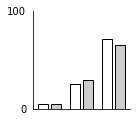

In [21]:
figsize = (2, 1.8)
n_subj = 1080
gids = (0, 1, 2)
gnames = ('single', 'two-C', 'two-S')
n_gid = len(gids)
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = None
# out_file = pjoin(work_dir, 'grouping_incidence_rate.jpg')

x = np.arange(n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
for hemi in hemis:
    gid_vec = np.load(gid_file.format(hemi=hemi))
    assert len(gid_vec) == n_subj
    y = np.zeros(n_gid, np.float64)
    for gid_idx, gid in enumerate(gids):
        y[gid_idx] = np.mean(gid_vec == gid) * 100
    rects = ax.bar(x+1.2*width*offset, y, width, label=hemi,
                   fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.1f')
    offset += 1
# ax.legend()
# ax.set_xlabel('FFA configuration')
# ax.set_xticks(x)
# ax.set_xticklabels(gnames)
# ax.set_ylabel('Percentage of population')
ax.set_yticks([0, 100])
ax.set_yticklabels([0, 100])
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('incidence rates')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画surface area

lh_pFus1: 0
lh_pFus2: 0
lh_mFus1: 0
lh_mFus2: 0
rh_pFus1: 0
rh_pFus2: 0
rh_mFus1: 0
rh_mFus2: 0


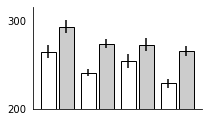

In [5]:
# figsize = None
figsize = (3, 1.8)
data_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_va.pkl')
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
rois = ('pFus-face', 'mFus-face')
n_roi = len(rois)
gids = (1, 2)
n_gid = len(gids)
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
# out_file = None
out_file = pjoin(work_dir, 'grouping_surface_area.jpg')

x = np.arange(n_roi * n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
xticklabels = []
for hemi_idx, hemi in enumerate(hemis):
    data = pkl.load(open(data_file.format(hemi=hemi), 'rb'))
    gid_vec = np.load(gid_file.format(hemi=hemi))
    y = np.zeros_like(x, np.float64)
    y_err = np.zeros_like(x, np.float64)
    x_idx = 0
    dataset = []
    for roi in rois:
        roi_idx = data['roi'].index(roi)
        meas_vec = data['meas'][roi_idx]
        for gid in gids:
            xticklabel = f"{roi.split('-')[0]}{gid}"
            meas_tmp = meas_vec[gid_vec == gid]
            nan_idx_vec = np.isnan(meas_tmp)
            print(f'{hemi}_{xticklabel}:', np.sum(nan_idx_vec))
            meas_tmp = meas_tmp[~nan_idx_vec]
            y[x_idx] = np.mean(meas_tmp)
            y_err[x_idx] = sem(meas_tmp)
            dataset.append(meas_tmp)
            x_idx += 1
            if hemi_idx == 1:
                xticklabels.append(xticklabel)
    x_tmp = x+1.2*width*offset
    rects = ax.bar(x_tmp, y, width, yerr=y_err,
                   label=hemi, fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.2f')

    # violins = ax.violinplot(dataset, x_tmp, widths=width,
    #                         showmeans=True, showextrema=False)
    # for pc in violins['bodies']:
    #     pc.set_facecolor(hemi2color[hemi])
    #     pc.set_edgecolor('k')
    #     pc.set_alpha(1)
    # violins['cmeans'].set_color('k')
    # ax.scatter(x_tmp, y, marker='o', color='r', s=30, zorder=2)
    # ax.vlines(x_tmp, y-y_err, y+y_err, color='k', linestyle='-', lw=5, zorder=1)

    offset += 1
# ax.set_xticks(x)
# ax.set_xticklabels(xticklabels)
ax.set_yticks([200, 300])
ax.set_yticklabels([200, 300])
# ax.set_ylabel('mm^2')
ax.set_ylim(200)
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('Surface area')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend()
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画测地距离

#lh_pFus-mFus: 1032
#rh_pFus-mFus: 1029


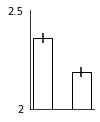

In [15]:
# figsize = None
figsize = (1.5, 1.8)
hemis = ('lh', 'rh')
n_hemi = len(hemis)
items = ('pFus-mFus',)
n_item = len(items)
item2color = {'pFus-mFus': 'w'}
data_file = pjoin(anal_dir, 'gdist_peak.csv')
# out_file = None
out_file = pjoin(work_dir, 'geodesic_distance.jpg')

df = pd.read_csv(data_file)
_, ax = plt.subplots(figsize=figsize)
x = np.arange(n_hemi)
width = auto_bar_width(x, n_item)
offset = -(n_item - 1) / 2
for item in items:
    ys = np.zeros(n_hemi)
    yerrs = np.zeros(n_hemi)
    dataset = []
    for hemi_idx, hemi in enumerate(hemis):
        col = hemi + '_' + item
        data = np.array(df[col])
        data = data[~np.isnan(data)] / 10
        print(f'#{col}: {len(data)}')
        ys[hemi_idx] = np.mean(data)
        yerrs[hemi_idx] = sem(data)
        dataset.append(data)
    x_tmp = x + 1.2 * width * offset

    # plot bar
    rects = ax.bar(x_tmp, ys, width, yerr=yerrs, label=item,
                   fc=item2color[item], ec='k')
    # show_bar_value(rects, '.2f')

    # plot violin
    # violins = ax.violinplot(dataset, x_tmp, widths=width,
    #                         showmeans=True, showextrema=False)
    # for pc in violins['bodies']:
    #     pc.set_facecolor(item2color[item])
    #     pc.set_edgecolor('k')
    #     pc.set_alpha(1)
    # violins['cmeans'].set_color('k')

    offset += 1
# ax.legend()
# ax.set_xticks(x)
# ax.set_xticklabels(hemis)
ax.set_ylim(2)
ax.set_yticks([2, 2.5])
ax.set_yticklabels([2, 2.5])
# ax.set_ylabel('cm')
# ax.set_title('Cortical distance\npFus and mFus')
ax.tick_params(bottom=False, labelbottom=False, left=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画各组ROI的face selectivity

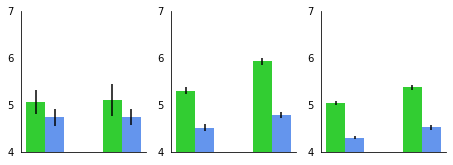

In [21]:
# figsize = None
figsize = (6.4, 2.4)
# gids = [-1, 0, 1, 2]
gids = [0, 1, 2]
gid2name = {
    -1: 'whole',
    0: 'single',
    1: 'two-C',
    2: 'two-S'
}
hemis = ['lh', 'rh']
rois = ['pFus-face', 'mFus-face']
src_file = pjoin(anal_dir, 'tfMRI/individual_activ_{hemi}.pkl')
# src_file = pjoin(anal_dir, 'tfMRI/individual_activ_{hemi}_emo.pkl')
# src_file = pjoin(anal_dir, 'split/tfMRI/activ_{hemi}.pkl')
# src_file = pjoin(anal_dir, 'tfMRI/MPM_v3_{hemi}_0.25_activ.pkl')
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
# out_file = None
out_file = pjoin(work_dir, 'grouping_face_selectivity.jpg')

n_hemi = len(hemis)
n_roi = len(rois)
hemi2data = {}
hemi2gid_vec = {}
for hemi in hemis:
    hemi2data[hemi] = pkl.load(open(src_file.format(hemi=hemi), 'rb'))
    hemi2gid_vec[hemi] = np.load(gid_file.format(hemi=hemi))

x = np.arange(n_hemi)
width = auto_bar_width(x, n_roi)
_, axes = plt.subplots(1, len(gids), figsize=figsize)
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    offset = -(n_roi - 1) / 2
    for roi in rois:
        y = np.zeros(n_hemi, np.float64)
        y_err = np.zeros(n_hemi, np.float64)
        for hemi_idx, hemi in enumerate(hemis):
            data = hemi2data[hemi]
            gid_vec = hemi2gid_vec[hemi]
            if gid == -1:
                gid_idx_vec = np.ones_like(gid_vec, bool)
            else:
                gid_idx_vec = gid_vec == gid
            roi_idx = data['roi'].index(roi)
            meas = data['meas'][roi_idx][gid_idx_vec]
            meas = meas[~np.isnan(meas)]
            y[hemi_idx] = np.mean(meas)
            y_err[hemi_idx] = sem(meas)
        rects = ax.bar(x+width*offset, y, width, yerr=y_err,
                       label=roi.split('-')[0], color=roi2color[roi])
        # show_bar_value(rects, '.2f', ax)
        offset += 1
    # if gid_idx == 1:
    #     ax.legend()
    # ax.set_xticks(x)
    # ax.set_xticklabels(hemis)
    # if gid_idx == 0:
    #     ax.set_ylabel('face selectivity')
    ax.set_ylim(4, 7)
    ax.set_yticks([4, 5, 6, 7])
    ax.set_yticklabels([4, 5, 6, 7])
    ax.tick_params(bottom=False, labelbottom=False, left=False)
    # ax.set_title(gid2name[gid])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画各组ROI的myelin和thickness

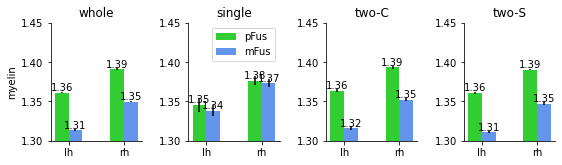

In [6]:
meas_name = 'myelin'  # myelin, thickness
meas2ylim = {
    'myelin': (1.3, 1.45),
    'thickness': (2, 4)
}
# figsize = None
# figsize = (6.4, 2.4)
figsize = (8, 2.4)
gids = [-1, 0, 1, 2]
# gids = [0, 1, 2]
gid2name = {
    -1: 'whole',
    0: 'single',
    1: 'two-C',
    2: 'two-S'
}
hemis = ['lh', 'rh']
rois = ['pFus-face', 'mFus-face']
src_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_{meas}.pkl')
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
# out_file = None
out_file = pjoin(work_dir, f'grouping_{meas_name}.jpg')

n_hemi = len(hemis)
n_roi = len(rois)
hemi2data = {}
hemi2gid_vec = {}
for hemi in hemis:
    hemi2data[hemi] = pkl.load(open(src_file.format(hemi=hemi, meas=meas_name), 'rb'))
    hemi2gid_vec[hemi] = np.load(gid_file.format(hemi=hemi))

x = np.arange(n_hemi)
width = auto_bar_width(x, n_roi)
_, axes = plt.subplots(1, len(gids), figsize=figsize)
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    offset = -(n_roi - 1) / 2
    for roi in rois:
        y = np.zeros(n_hemi, np.float64)
        y_err = np.zeros(n_hemi, np.float64)
        for hemi_idx, hemi in enumerate(hemis):
            data = hemi2data[hemi]
            gid_vec = hemi2gid_vec[hemi]
            if gid == -1:
                gid_idx_vec = np.ones_like(gid_vec, bool)
            else:
                gid_idx_vec = gid_vec == gid
            roi_idx = data['roi'].index(roi)
            meas = data['meas'][roi_idx][gid_idx_vec]
            meas = meas[~np.isnan(meas)]
            y[hemi_idx] = np.mean(meas)
            y_err[hemi_idx] = sem(meas)
        rects = ax.bar(x+width*offset, y, width, yerr=y_err,
                       label=roi.split('-')[0], color=roi2color[roi])
        show_bar_value(rects, '.2f', ax)
        offset += 1
    if gid_idx == 1:
        ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(hemis)
    if gid_idx == 0:
        ax.set_ylabel(meas_name)
    ax.set_ylim(*meas2ylim[meas_name])
    # ax.set_yticks([4, 5, 6, 7])
    # ax.set_yticklabels([4, 5, 6, 7])
    # ax.tick_params(bottom=False, labelbottom=False, left=False)
    ax.set_title(gid2name[gid])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# radar plot of RSFC for each group

1 Primary Visual
2 Secondary Visual
3 Somatomotor
4 Cingulo-Opercular
5 Dorsal-attention
6 Language
7 Frontoparietal
8 Auditory
9 Default
10 Posterior Multimodal
11 Ventral Multimodal
12 Orbito-Affective


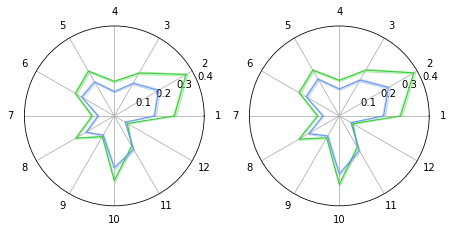

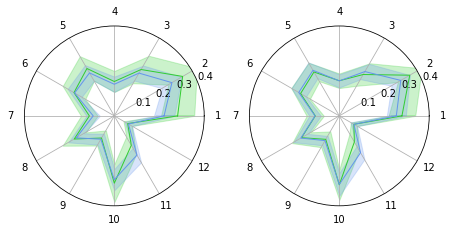

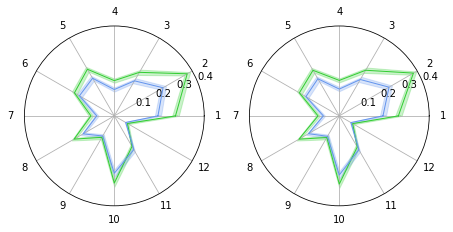

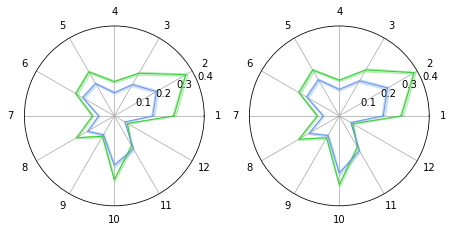

In [11]:
figsize = (6.4, 4.8)
gids = [-1, 0, 1, 2]
gid2name = {
    -1: 'whole',
    0: 'single',
    1: 'two-C',
    2: 'two-S'
}
hemis = ('lh', 'rh')
seed_names = ['pFus-face', 'mFus-face']
src_file = pjoin(anal_dir, 'rfMRI/rsfc_individual2Cole_{hemi}.pkl')
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = pjoin(work_dir, '{}_radar.jpg')

hemi2data = {}
hemi2gid_vec = {}
for hemi in hemis:
    hemi2data[hemi] = pkl.load(open(src_file.format(hemi=hemi), 'rb'))
    hemi2gid_vec[hemi] = np.load(gid_file.format(hemi=hemi))

label2net_cole = {}
for k, v in net2label_cole.items():
    label2net_cole[v] = k
assert hemi2data['lh']['trg_label'] == hemi2data['rh']['trg_label']
trg_labels = hemi2data['lh']['trg_label']
trg_names = [label2net_cole[_] for _ in trg_labels]
n_trg = len(trg_labels)

angles = np.linspace(0, 2 * np.pi, n_trg, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
for gid in gids:
    _, axes = plt.subplots(1, len(hemis), subplot_kw=dict(polar=True),
                           num=gid, figsize=figsize)
    for hemi_idx, hemi in enumerate(hemis):
        ax = axes[hemi_idx]
        data = hemi2data[hemi]
        gid_vec = hemi2gid_vec[hemi]
        if gid == -1:
            gid_idx_vec = np.ones_like(gid_vec, bool)
        else:
            gid_idx_vec = gid_vec == gid
        for seed_name in seed_names:
            means = np.ones(n_trg) * np.nan
            errs = np.ones(n_trg) * np.nan
            for trg_idx in range(n_trg):
                samples = data[seed_name][:, trg_idx][gid_idx_vec]
                samples = samples[~np.isnan(samples)]
                means[trg_idx] = np.mean(samples)
                errs[trg_idx] = sem(samples)
            means = np.r_[means, means[0]]
            errs = np.r_[errs, errs[0]] * 2
            ax.plot(angles, means, linewidth=1,
                    linestyle='solid', label=seed_name.split('-')[0],
                    color=roi2color[seed_name])
            ax.fill_between(angles, means-errs, means+errs,
                            color=roi2color[seed_name], alpha=0.25)
        # ax.legend(loc='upper center')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(trg_labels)
        ax.set_ylim(0, 0.4)
        ax.set_yticks([0.1, 0.2, 0.3, 0.4])
        ax.set_yticklabels([0.1, 0.2, 0.3, 0.4])
        ax.grid(axis='y')
    plt.tight_layout()
    plt.savefig(out_file.format(gid2name[gid]))

for lbl, name in zip(trg_labels, trg_names):
    print(lbl, name)

# plot bar for RSFC

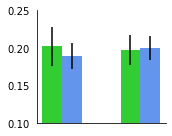

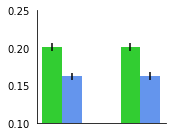

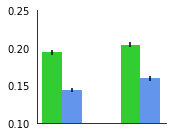

In [14]:
figsize = (2.5, 2)
# gids = [-1, 0, 1, 2]
gids = [0, 1, 2]
gid2name = {
    -1: 'whole',
    0: 'single',
    1: 'two-C',
    2: 'two-S'
}
hemis = ('lh', 'rh')
seed_names = ['pFus-face', 'mFus-face']
src_file = pjoin(anal_dir, 'rfMRI/rsfc_individual2Cole_{hemi}.pkl')
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = pjoin(work_dir, '{}_bar.jpg')

n_hemi = len(hemis)
hemi2data = {}
hemi2gid_vec = {}
for hemi in hemis:
    hemi2data[hemi] = pkl.load(open(src_file.format(hemi=hemi), 'rb'))
    hemi2gid_vec[hemi] = np.load(gid_file.format(hemi=hemi))
n_seed = len(seed_names)


x = np.arange(n_hemi)
width = auto_bar_width(x, n_seed)
for gid in gids:
    _, ax = plt.subplots(figsize=figsize)
    offset = -(n_seed - 1) / 2
    for seed_name in seed_names:
        means = np.ones(n_hemi) * np.nan
        errs = np.ones(n_hemi) * np.nan
        for hemi_idx, hemi in enumerate(hemis):
            data = hemi2data[hemi]
            gid_vec = hemi2gid_vec[hemi]
            if gid == -1:
                gid_idx_vec = np.ones_like(gid_vec, bool)
            else:
                gid_idx_vec = gid_vec == gid
            samples = np.mean(data[seed_name], 1)[gid_idx_vec]
            samples = samples[~np.isnan(samples)]
            means[hemi_idx] = np.mean(samples)
            errs[hemi_idx] = sem(samples)
        ax.bar(x+width*offset, means, width, yerr=errs,
               label=seed_name.split('-')[0], color=roi2color[seed_name])
        offset += 1
    # show_bar_value(ax.patches, '.3f', ax)
    # ax.legend()
    # ax.set_xticks(x)
    # ax.set_xticklabels(hemis)
    # ax.set_ylabel('pearson R')
    # ax.set_title(f"{gid2name[gid]}_{seed_name}")
    ax.set_ylim(0.1, 0.25)
    # ax.set_yticks([0.1, 0.2, 0.3, 0.4])
    # ax.set_yticklabels([0.1, 0.2, 0.3, 0.4])
    ax.tick_params(bottom=False, labelbottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(out_file.format(gid2name[gid]))

# plot distance between pFus and mFus for each group

#lh_pFus-mFus: 268
#rh_pFus-mFus: 321
#lh_pFus-mFus: 764
#rh_pFus-mFus: 708


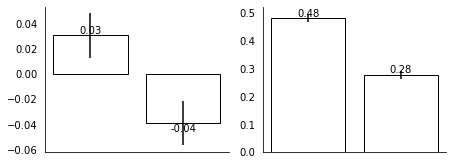

In [5]:
method = 'AP_gap-y'  # 'peak', 'min', 'AP_gap-y', 'AP_gap-geo'
method2ylim = {
    'peak': (1.5, 2.6),
    'AP_gap-y': (None, None),
    'AP_gap-geo': (0.8, 1.3)
}
# figsize = None
figsize = (6.4, 2.4)
hemis = ('lh', 'rh')
gids = (1, 2)
gid2name = {
    1: 'two-C',
    2: 'two-S'
}
data_file = pjoin(anal_dir, f'gdist_{method}.csv')
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = None
# out_file = pjoin(work_dir, f'grouping_distance_{method}.jpg')

n_gid = len(gids)
n_hemi = len(hemis)
hemi2gid_vec = {}
for hemi in hemis:
    hemi2gid_vec[hemi] = np.load(gid_file.format(hemi=hemi))
df = pd.read_csv(data_file)

_, axes = plt.subplots(1, n_gid, figsize=figsize)
x = np.arange(n_hemi)
# width = 0.25
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    ys = np.zeros(n_hemi)
    yerrs = np.zeros(n_hemi)
    dataset = []
    for hemi_idx, hemi in enumerate(hemis):
        col = f'{hemi}_pFus-mFus'
        gid_idx_vec = hemi2gid_vec[hemi] == gid
        data = np.array(df[col])[gid_idx_vec]
        data = data[~np.isnan(data)] / 10
        print(f'#{col}: {len(data)}')
        ys[hemi_idx] = np.mean(data)
        yerrs[hemi_idx] = sem(data)
        dataset.append(data)

    # plot bar
    rects = ax.bar(x, ys, yerr=yerrs, fc='w', ec='k')
    show_bar_value(rects, '.2f', ax)

    # plot violin
#     violins = ax.violinplot(dataset, x, widths=width,
#                             showmeans=True, showextrema=False)
#     for pc in violins['bodies']:
#         pc.set_facecolor('w')
#         pc.set_edgecolor('k')
#         pc.set_alpha(1)
#     violins['cmeans'].set_color('k')

#     ax.set_xticks(x)
#     ax.set_xticklabels(hemis)
    ax.set_ylim(*method2ylim[method])
#     ax.set_yticks([2, 2.5])
#     ax.set_yticklabels([2, 2.5])
#     ax.set_ylabel('cm')
#     ax.set_title(f'{method} distance\n{gid2name[gid]}')
    ax.tick_params(bottom=False, labelbottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)